In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')
import xgboost as xgb
import pandas as pd
from features.UserJoin import UserJoin
from features.UserJoin import submit, diff, plt_month, plt_day, load_ids
import config as C
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/envs/miner/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
# data
ds = UserJoin()

In [6]:
ds.month.iloc[:1, 9:]

,ELEC_TYPE_NAME,VOLT_NAME,PRC_NAME,CONTRACT_CAP,RUN_CAP,SHIFT_NO,BUILD_DATE,CANCEL_DATE,CHK_CYCLE,LAST_CHK_DATE,TMP_NAME,TMP_DATE,IS_FLAG,label,p_f,p_g,f_g,monthcv
id,,,,,,,,,,,,,,,,,,
179404030,城镇居民生活用电,交流380V,居民生活<1kV(合表),20.0,20.0,0.0,1998/12/1,0,24.0,1998/12/1,非临时用电,0.0,NaN,test,0.696148,0.308131,0.388017,1.046512


/opt/conda/envs/miner/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[18:22:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0


<AxesSubplot:>

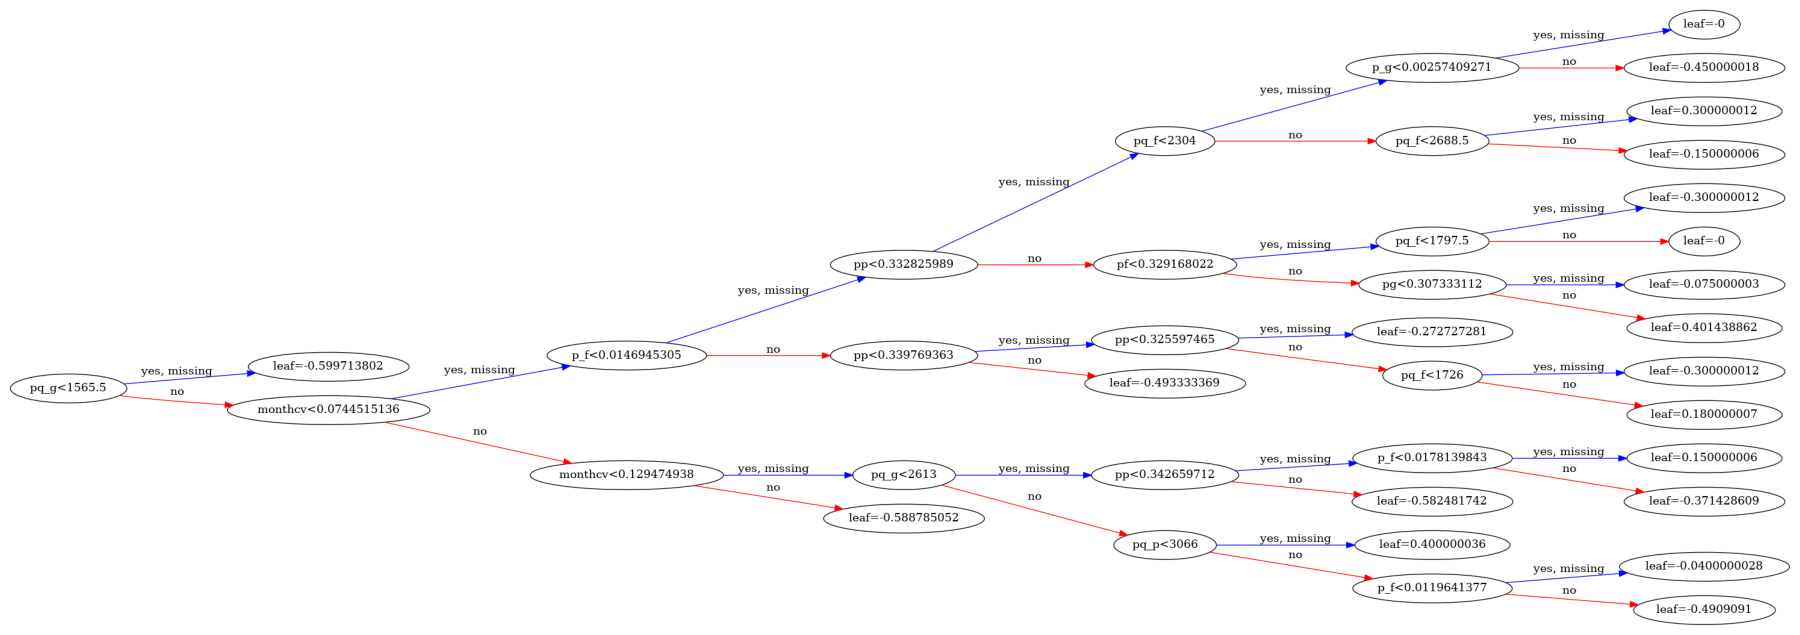

In [88]:
df = ds.month
features = [
    # strong
    # 'VOLT_NAME',
    'pq_f',
    'pq_g',
    'pq_p',
    'pq_z',
    'pf',
    'pp',
    'pg',
    'p_f',
    'p_g',
    'f_g',
    'monthcv',

    # possible
    # 'ym',
    # 'CONTRACT_CAP',
    # 'RUN_CAP',
    # 'ELEC_TYPE_NAME',


    # useless
    # 'PRC_NAME',
    # 'SHIFT_NO',
    # 'BUILD_DATE',
    # 'CANCEL_DATE',
    # 'CHK_CYCLE',
    # 'LAST_CHK_DATE',

]
x = df.loc[df.label != 'test', features]
x_val = df.loc[df.label == 'test', features]
y = df.loc[df.label != 'test', 'IS_FLAG']

model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x, y)
y_pred = model.predict(x)
print((y_pred != y).sum())
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(32, 16))
plot_tree(model, ax=ax, rankdir='LR')

In [89]:
pred = pd.DataFrame({'id': x.index.values, 'pred': y_pred.astype(int)}).groupby('id').sum()
pred[pred.pred>0].shape

(10, 1)

27
in s1 not s2 7
in s2 not s1 0
inner 27


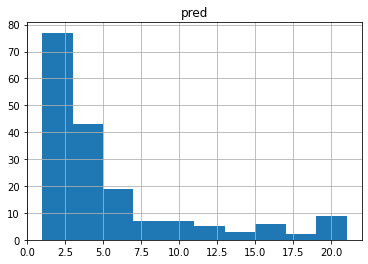

In [116]:
y_val = model.predict(x_val).astype(int)
pred = pd.DataFrame({'id': x_val.index.values, 'pred': y_val.astype(int)}).groupby('id').sum()
pred[pred.pred != 0].hist()
tmp = pred.loc[[362400993, 887227796, 2238809293],:]
pred = pred[pred.pred > 11]


pred = pd.concat([pred, tmp])

submit(pred.index.unique(), 'submit_3_8_3.csv')
inner = diff('submit_3_8_1.csv', 'submit_3_8_3.csv')

In [107]:
# s1 = load_ids('submit_3_7_1.csv')
# s2 = load_ids('tsubmit_3_7_2.csv')
# s = s1 - s2
plt_month([362400993, 887227796, 2238809293], df=ds.month)
# plt_month(list(inner), df=ds.month)

[362400993, 887227796, 2238809293]


In [96]:
plt_month(pred.index.unique(), df=ds.month)


Int64Index([ 179433516,  179458306,  179569820,  855996491, 1606708811,
            1916407803, 2071313507, 2172970175, 2186749200, 2212416005,
            2251440776, 2256064355, 2347718608, 2347718610, 2427050072,
            2445049876, 2471562086, 2479963778, 2496032641, 2523401557],
           dtype='int64', name='id')


Int64Index([2576321385, 2602819207, 2717225077, 2745781539, 2759232590], dtype='int64', name='id')


In [83]:
s1 = set([179458306, 2745781539, 2071313507, 2212416005, 2471562086, 2251440776, 2576321385, 855996491, 179433516, 1606708811, 2186749200, 2445049876, 2717225077, 2427050072, 1916407803, 2172970175])
s2 = set([2496032641, 179458306, 2479963778, 2212416005, 2602819207, 2251440776, 2186749200, 2445049876, 179569820, 2451165982, 2172970175, 855996491, 1606708811, 2238809293, 2759232590, 2347718608, 2347718610, 2523401557, 2427050072, 2535198432, 2071313507, 2256064355, 2471562086, 2717225077, 1916407803])
print(len(s1))
print(len(s2))
len(s1 & s2)

16
25


13

In [44]:
ds.month.columns

Index(['ym', 'pq_f', 'pq_g', 'pq_p', 'pq_z', 'pf', 'pg', 'pp', '   ',
       'ELEC_TYPE_NAME', 'VOLT_NAME', 'PRC_NAME', 'CONTRACT_CAP', 'RUN_CAP',
       'SHIFT_NO', 'BUILD_DATE', 'CANCEL_DATE', 'CHK_CYCLE', 'LAST_CHK_DATE',
       'TMP_NAME', 'TMP_DATE', 'IS_FLAG', 'label', 'p_f', 'p_g', 'f_g',
       'monthcv', 'pq_cv'],
      dtype='object')

In [60]:
mean = ds.month[['pq_f', 'pq_g', 'pq_p']].mean(axis=1)
std = ds.month[['pq_f', 'pq_g', 'pq_p']].std(axis=1)

# ds.month['pq_cv'] = std / (mean + 1e-5)
# print(ds.month[(ds.month['monthcv'] < 0.085) & (ds.month.pq_z > 4500) & (ds.month.label != 'test')].index.nunique())
# print(ds.month[(ds.month.pq_cv < 0.085) & (ds.month.pq_z > 4500) & (ds.month.label != 'test')].index.nunique())

baseids = ds.train[(ds.train.monthcv < 0.085) & (ds.train.pq_z > 4500) & (ds.train.label == 'test')].index.unique()
submit(baseids, 'wechat.csv')

43


,id,label
0,179406029,0
1,179406030,0
2,179406094,0
3,179406097,0
4,179406099,0
...,...,...
15374,2849971818,0
15375,2850017469,0
15376,2850017472,0
15377,2851323065,0


In [38]:
import sys
sys.path.append('../src')
from features.MonthData import MonthData
d = MonthData().df
mean = d[['pq_f', 'pq_g', 'pq_p']].mean(axis=1)
std = d[['pq_f', 'pq_g', 'pq_p']].std(axis=1)
d['cv'] = std / (mean + 1e-5)

,pq_f,pq_g,pq_p
0,615,161,0
1,492,154,-1
2,457,114,1
3,522,171,0
4,519,181,0
...,...,...,...
194475,107,67,-1
194476,170,112,1
194477,102,67,0
194478,112,65,-1
